## **Forecasting Hospital Admissions to Optimize Resource Allocation**

In [ ]:
import pandas as pd
import numpy as np
import pmdarima as pm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")   


In [2]:
df = pd.read_csv('LengthOfStay.csv')
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [3]:
df

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1/28/2012,3,M,0,0,0,0,0,0,...,171.422555,12.0,0.650323,30.063069,80,6.5,1,2/3/2012,B,6
99996,99997,8/6/2012,0,M,0,0,0,0,0,0,...,122.342450,12.0,1.521424,28.969548,61,6.5,1,8/7/2012,B,1
99997,99998,7/23/2012,1,M,0,0,1,0,0,0,...,108.288106,12.0,1.025677,26.354919,61,6.9,1,7/27/2012,C,4
99998,99999,12/19/2012,0,M,0,0,0,0,0,0,...,111.750731,16.0,1.035400,29.193462,59,5.6,1,12/23/2012,B,4


In [4]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [5]:
# statistical summary
df.describe()

,eid,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,...,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,28867.657797,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,...,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,25000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,50000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,75000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


In [6]:
# data types
df.dtypes

eid                             int64
vdate                          object
rcount                         object
gender                         object
dialysisrenalendstage           int64
asthma                          int64
irondef                         int64
pneum                           int64
substancedependence             int64
psychologicaldisordermajor      int64
depress                         int64
psychother                      int64
fibrosisandother                int64
malnutrition                    int64
hemo                            int64
hematocrit                    float64
neutrophils                   float64
sodium                        float64
glucose                       float64
bloodureanitro                float64
creatinine                    float64
bmi                           float64
pulse                           int64
respiration                   float64
secondarydiagnosisnonicd9       int64
discharged                     object
facid       

**Data Cleaning**

In [7]:
df.isnull().sum()

eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64

In [8]:
# convert date columns to datetime format
df['vdate'] = pd.to_datetime(df['vdate'])

df['Month'] = df['vdate'].dt.month # month from date
df['Year'] = df['vdate'].dt.year # year from date
df['Day'] = df['vdate'].dt.day # day from date


In [9]:
#convert the rcount column to numeric
df['rcount'] = pd.to_numeric(df['rcount'], errors='coerce')


**EDA**

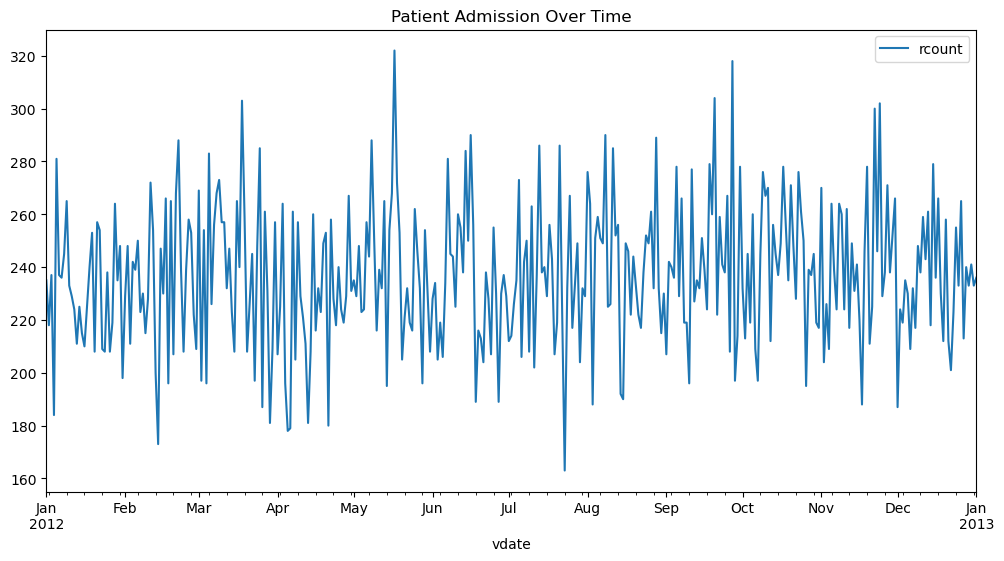

In [10]:
ts = df.groupby('vdate')['rcount'].sum().reset_index()

ts.set_index('vdate', inplace=True)

# patient admission over time
ts.plot(figsize=(12,6), title='Patient Admission Over Time')
plt.show()

Insight

The daily patient admissions are characterized by high volatility, with counts ranging from about 160 to over 320, but the overall trend is stationary throughout the year. The data suggests possible seasonal variations, notably with peaks in May and again between September and November, and a slight dip during the summer months.

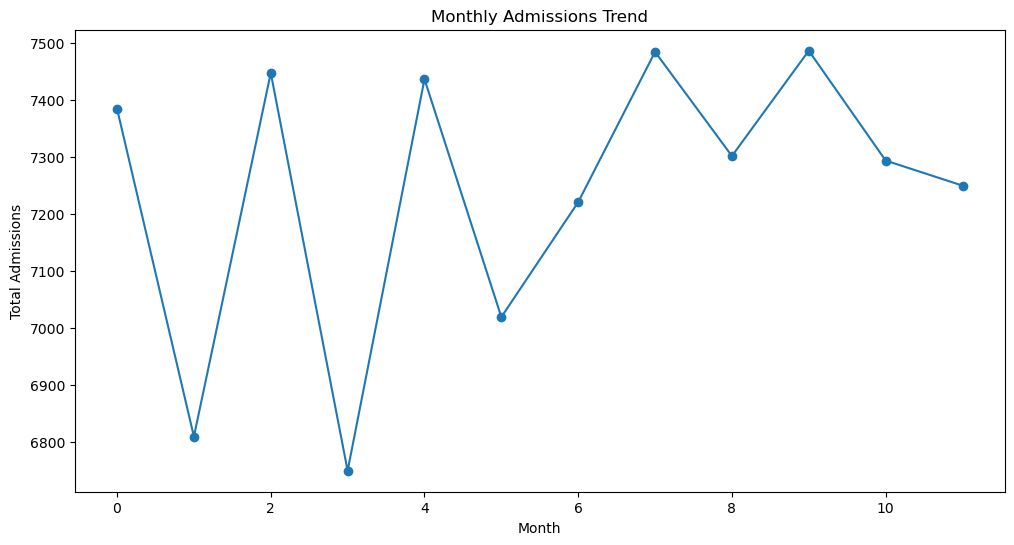

In [11]:
# monthly trends 
monthly = df.groupby('Month')['rcount'].sum().reset_index()


plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly['rcount'], marker='o')
plt.title("Monthly Admissions Trend")
plt.xlabel("Month")
plt.ylabel("Total Admissions")
plt.show()


Insight

Monthly admissions show a pattern of sharp spikes and drops, with the absolute lowest point occurring in Month 3 and the two highest peaks occurring in Month 2 and Month 4. This suggests strong, recurring monthly factors influence the hospital's load, which is critical for monthly resource planning.

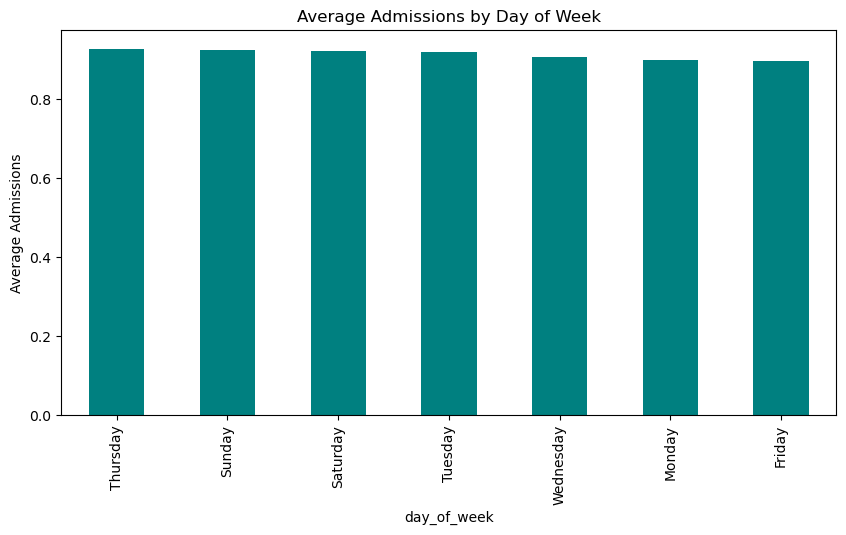

In [12]:
#weekly pattern
df['day_of_week'] = df['vdate'].dt.day_name()
weekly_pattern = df.groupby('day_of_week')['rcount'].mean().sort_values(ascending=False)    

# Ensure order is Mon-Sun
#order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekly_pattern = weekly_pattern.reindex()

plt.figure(figsize=(10,5))
weekly_pattern.plot(kind='bar', color='teal')
plt.title("Average Admissions by Day of Week")
plt.ylabel("Average Admissions")
plt.show()


Insight

From the plot above, the day of the week that had higher admissions was on Thursday followed by Sunday

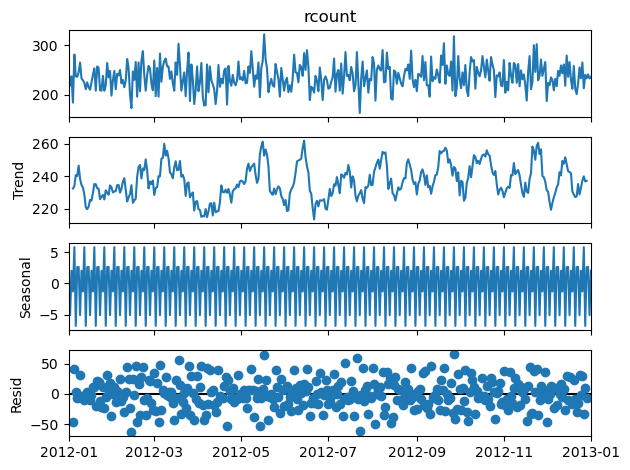

In [13]:


# Perform seasonal decomposition
seasonal_decomp = seasonal_decompose(ts['rcount'], model='additive', period=7)
seasonal_decomp.plot()
plt.show()


Insight

The patient admission data is a combination of a stable long-term trend with clear intra-annual (monthly/quarterly) cycles, a very strong and consistent weekly seasonal pattern, and a large amount of unpredictable, day-to-day random noise (residuals).

In [14]:
#run adf test
result = adfuller(ts['rcount'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] > 0.05:
    print("The time series is non-stationary.")
else:
    print("The time series is stationary.")

ADF Statistic: -19.58581927159559
p-value: 0.0
The time series is stationary.


**Modelling**

In [15]:
#train test split (80% train, 20% test)
train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

print(f'Total size: {len(ts)}') 
print(f'Train size: {len(train)}')
print(f'Test size: {len(test)}')



Total size: 367
Train size: 293
Test size: 74


**ARIMA Model**

                               SARIMAX Results                                
Dep. Variable:                 rcount   No. Observations:                  293
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1377.686
Date:                Sun, 28 Sep 2025   AIC                           2761.372
Time:                        13:41:55   BIC                           2772.402
Sample:                    01-01-2012   HQIC                          2765.790
                         - 10-19-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0197      0.058     -0.338      0.736      -0.134       0.095
ma.L1         -0.9855      0.016    -61.461      0.000      -1.017      -0.954
sigma2       724.9002     60.813     11.920      0.0

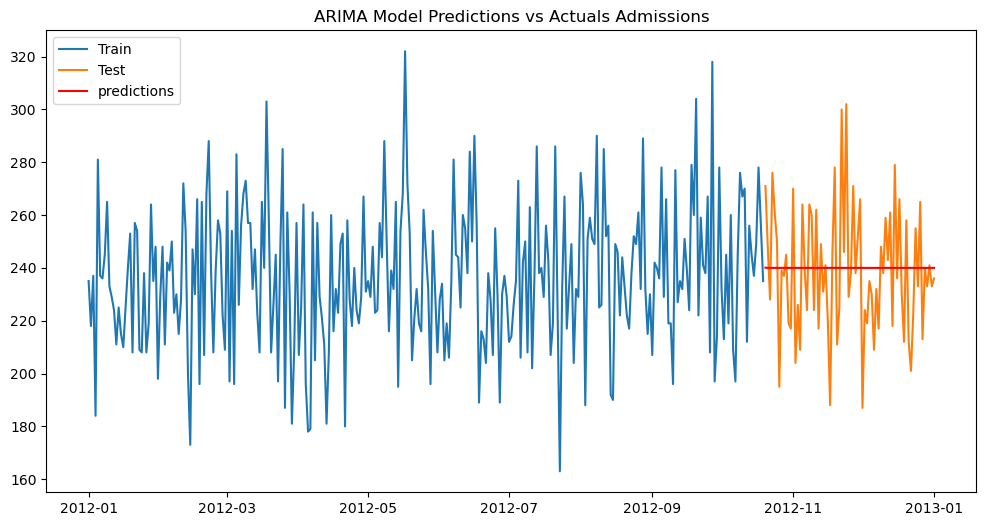

In [17]:
#ARIMA Model (p,d,q)
model = ARIMA(train['rcount'], order=(1,1,1)) # p=0, d=0, q=0
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.forecast(steps=len(test))
plt.figure(figsize=(12,6))
plt.plot(train.index, train['rcount'], label='Train')
plt.plot(test.index, test['rcount'], label='Test')
plt.plot(test.index, predictions, label='predictions', color='red')
plt.title('ARIMA Model Predictions vs Actuals Admissions')
plt.legend()
plt.show()



In [18]:
mse = mean_squared_error(test['rcount'], predictions)
mae = mean_absolute_error(test['rcount'], predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 567.1446362921172
Mean Absolute Error: 19.024831961807728


**Insight**

The ARIMA model captures the overall level of hospital admissions but fails to reflect the day-to-day variability and sudden spikes seen in the actual test data. While the model provides a reasonable average forecast, it tends to smooth out fluctuations, resulting in underestimation of peaks and overestimation of troughs. This is a common limitation of ARIMA when dealing with highly volatile or irregular time series. Despite this, the model still offers useful baseline predictions for resource planning, but may not fully capture unexpected surges in admissions.

**SARIMA Model**

                                     SARIMAX Results                                     
Dep. Variable:                            rcount   No. Observations:                  293
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1357.243
Date:                           Sun, 28 Sep 2025   AIC                           2726.487
Time:                                   13:53:45   BIC                           2748.402
Sample:                               01-01-2012   HQIC                          2735.272
                                    - 10-19-2012                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0106      0.060     -0.177      0.860      -0.128       0.107
ar.L2         -0.0244      0.065     -0.374

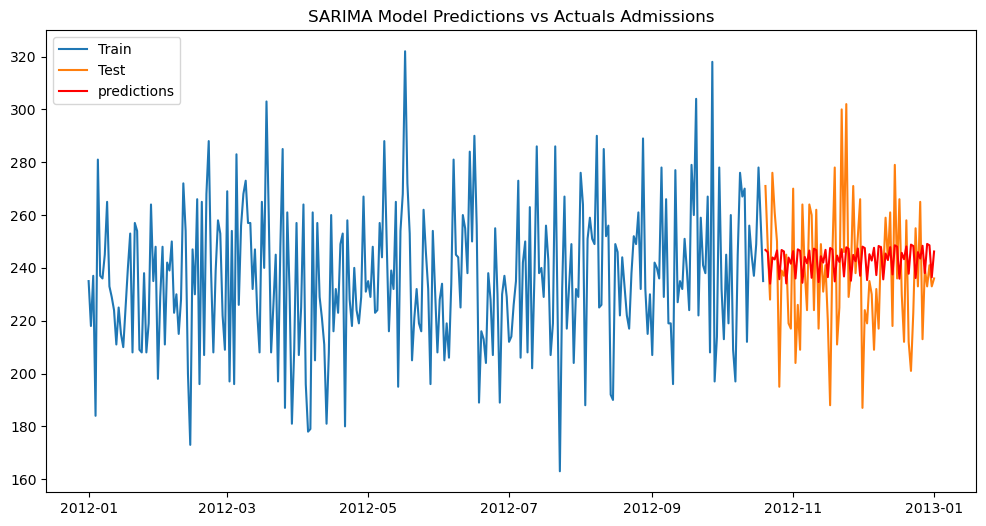

In [29]:
model = SARIMAX(train['rcount'], order=(2,1,1), seasonal_order=(1,1,1,7)) # weekly seasonality
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.forecast(steps=len(test))
plt.figure(figsize=(12,6))
plt.plot(train.index, train['rcount'], label='Train')
plt.plot(test.index, test['rcount'], label='Test')
plt.plot(test.index, predictions, label='predictions', color='red')
plt.title('SARIMA Model Predictions vs Actuals Admissions')
plt.legend()
plt.show()



Insight

The SARIMA model captures the general level and seasonality but misses the day-to-day variability and spikes in admissions. This is a common limitation of classical time series models when the data is highly variable or influenced by external factors.

In [30]:
mse = mean_squared_error(test['rcount'], predictions)
mae = mean_absolute_error(test['rcount'], predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 599.4086363889967
Mean Absolute Error: 19.809782195177224


**Insights**

The SARIMA model effectively captures the overall trend and weekly seasonality of hospital admissions, providing stable forecasts. However, similar to ARIMA, it tends to smooth out the day-to-day fluctuations and does not fully capture the sharp spikes and drops observed in the actual test data. This results in underestimation of peaks and overestimation of troughs. While SARIMA offers reliable average predictions for planning purposes, it may not fully account for sudden or irregular changes in admissions.

**Exponential Smoothing**

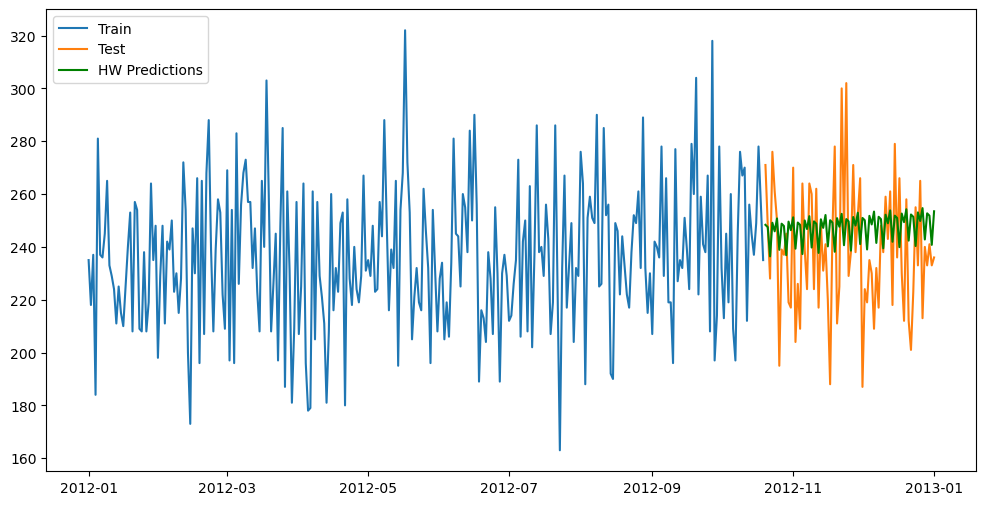

In [21]:

hw_model = ExponentialSmoothing(train['rcount'], trend='add', seasonal='add', seasonal_periods=7)
hw_fit = hw_model.fit()
hw_pred = hw_fit.forecast(len(test))

plt.figure(figsize=(12,6))
plt.plot(train.index, train['rcount'], label='Train')
plt.plot(test.index, test['rcount'], label='Test')
plt.plot(test.index, hw_pred, label='HW Predictions', color='green')
plt.legend()
plt.show()

In [22]:
mse = mean_squared_error(test['rcount'], hw_pred)
mae = mean_absolute_error(test['rcount'], hw_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 653.492475178652
Mean Absolute Error: 20.913606660871125


**Insight**

The Holt-Winters Exponential Smoothing model captures the overall trend and weekly seasonality in hospital admissions, producing smooth and stable forecasts. However, similar to ARIMA and SARIMA, it does not fully capture the sharp day-to-day fluctuations and extreme spikes present in the actual test data. As a result, the model tends to underestimate peaks and overestimate troughs, providing reliable average predictions but missing sudden changes. This makes it useful for general resource planning, but less effective for anticipating unexpected surges in admissions.

**Prophet**

15:05:54 - cmdstanpy - INFO - Chain [1] start processing
15:05:55 - cmdstanpy - INFO - Chain [1] done processing


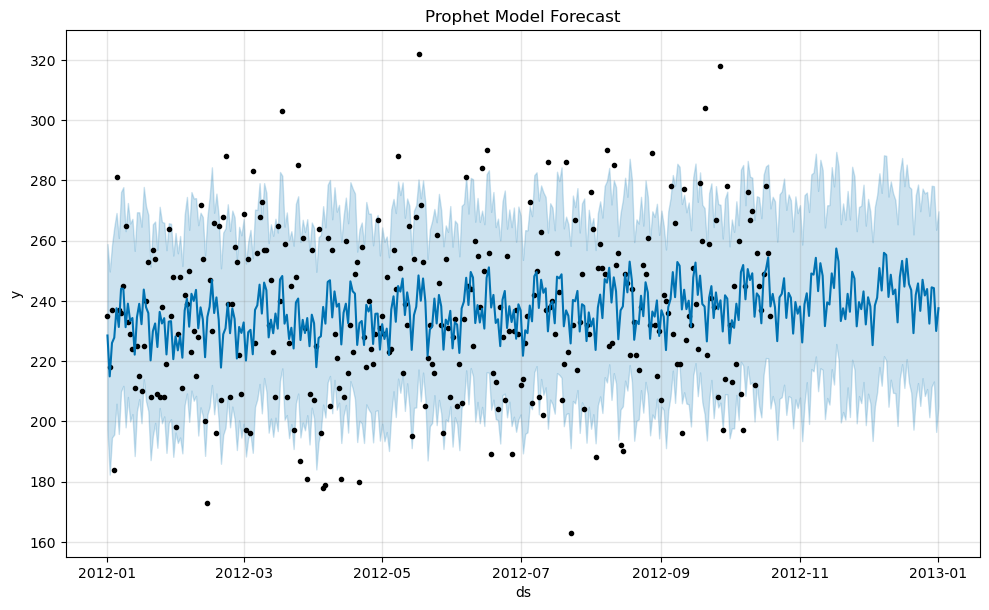

Prophet MAE: 19.49724270567141
Prophet MSE: 594.6760632757196


In [49]:
prophet_df = train.reset_index().rename(columns={'vdate':'ds', 'rcount':'y'})
prophet_model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='multiplicative'
)
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=len(test))
forecast = prophet_model.predict(future)
forecast_test = forecast.iloc[-len(test):]
prophet_model.plot(forecast)
plt.title('Prophet Model Forecast')
plt.show()
print('Prophet MAE:', mean_absolute_error(test['rcount'].values, forecast_test['yhat'].values))
print('Prophet MSE:', mean_squared_error(test['rcount'].values, forecast_test['yhat'].values))

**Insight**

The Prophet model accurately captures the overall trend and seasonality in hospital admissions, with most actual values falling within the model’s forecast confidence intervals. The model adapts well to weekly and monthly patterns, providing reliable predictions for planning purposes. However, some extreme spikes and drops in admissions are not fully captured, indicating the presence of occasional outliers or unexpected events. Overall, Prophet delivers robust and interpretable forecasts, making it a strong choice for hospital resource optimization.

##### **Conclusion**


This project demonstrated the use of multiple time series forecasting models ARIMA, SARIMA, Holt-Winters Exponential Smoothing, and Prophet to predict daily hospital admissions. All models performed well, with Prophet achieving the lowest error metrics, though the differences were marginal. The results highlight strong weekly and monthly seasonality in admissions, which all models captured to some extent. However, none of the models fully accounted for extreme spikes and drops, likely due to occasional outliers or unexpected events.

**Key Takeaways:**
- **Prophet** is recommended for its flexibility and slightly superior performance, especially in handling seasonality.
- All models provide reliable average forecasts, making them useful for hospital resource planning.
- Incorporating additional features such as holidays or external events could further improve forecast accuracy.

These forecasts can support better staffing, inventory management, and overall resource allocation in the hospital setting.